[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]
Confusion Matrix:  [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy :  95.55555555555556
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



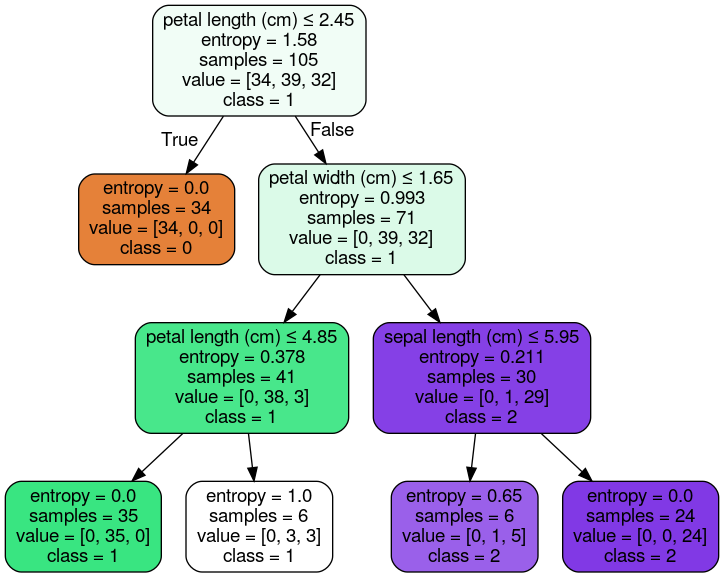

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


iris = load_iris()

def splitData():
    x = iris.data
    y = iris.target
     
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
    return x_train,x_test,y_train,y_test

def trainTest():
    # create a dicision tree classfier using entropy criteron or ID3 algo
    clf =  DecisionTreeClassifier(criterion = "entropy",       
			random_state = 100,max_depth=3, min_samples_leaf=5)
    clf.fit(x_train,y_train)
    return clf 

# predict y clas value on X_test data
def prediction(x_test,clf_object):
   y_pred = clf_object.predict(x_test)
   print(y_pred)
   return y_pred

# measure accuracy
def accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", 
	confusion_matrix(y_test, y_pred) )
	
	print ("Accuracy : ", 
	accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", 
	classification_report(y_test, y_pred)) 

     

x_train,x_test,y_train,y_test = splitData()
y_pred = prediction(x_test,trainTest())
accuracy(y_test,y_pred)    
clf = trainTest()     # clf is dicision classifier object


# plot graphviz flowchart of decision tree
"""export_graphviz function converts decision tree classifier into dot file and 
pydotplus convert this dot file to png or displayable form on Jupyter."""
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')   # convert dot file into png image
Image(graph.create_png())



